04-637 A: Mobile Big Data Analytics and 
Management



Andrew_ID: emuhigir

Create a clean, analysis-ready dataset.

In [64]:

# TASK I: Load, Clean, and Prepare Mobile Activity Data


import pandas as pd
import numpy as np
import os


# 1. Define the folder path containing the datasets


data_path = r"C:\Users\emuhi\OneDrive\Desktop\BRAIN\Mobile Big Data Analytics and Management\emuhigir\data"


# 2. Define the three activity dataset filenames

file_names = [
    "sms-call-internet-mi-2013-11-02.csv",
    "sms-call-internet-mi-2013-11-04.csv",
    "sms-call-internet-mi-2013-11-06.csv"
]


# 3. Load all datasets into a list of DataFrames

dataframes = []

for file in file_names:
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    df["source_file"] = file   # Track origin of each record
    dataframes.append(df)


# 4. Combine all datasets into a single DataFrame

combined_df = pd.concat(dataframes, ignore_index=True)


# 5. Add date and time columns
#    Dataset already contains a 'datetime' column

combined_df["datetime"] = pd.to_datetime(combined_df["datetime"])
combined_df["date"] = combined_df["datetime"].dt.date
combined_df["hour"] = combined_df["datetime"].dt.hour


# 6. Handle missing values
#    Assignment requirement: fill missing numeric values using the mean of each column

numeric_columns = combined_df.select_dtypes(include=np.number).columns
combined_df[numeric_columns] = combined_df[numeric_columns].fillna(
    combined_df[numeric_columns].mean()
)


# 7. Add aggregate activity columns

combined_df["total_sms"] = combined_df["smsin"] + combined_df["smsout"]
combined_df["total_calls"] = combined_df["callin"] + combined_df["callout"]
combined_df["total_internet"] = combined_df["internet"]


# 8. Final preview (safe for large datasets)

combined_df.head()


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,source_file,date,hour,total_sms,total_calls,total_internet
0,2013-11-02,1,0,0.2445,7.440751,7.738604,5.686694,101.976153,sms-call-internet-mi-2013-11-02.csv,2013-11-02,0,7.685251,13.425298,101.976153
1,2013-11-02,1,39,1.4952,1.121300,0.270800,0.300400,46.509400,sms-call-internet-mi-2013-11-02.csv,2013-11-02,0,2.616500,0.571200,46.509400
2,2013-11-02,1,53,0.0018,0.003600,7.738604,5.686694,101.976153,sms-call-internet-mi-2013-11-02.csv,2013-11-02,0,0.005400,13.425298,101.976153
3,2013-11-02,2,0,0.2458,7.440751,7.738604,5.686694,101.976153,sms-call-internet-mi-2013-11-02.csv,2013-11-02,0,7.686551,13.425298,101.976153
4,2013-11-02,2,39,1.5028,1.124300,0.275100,0.302300,46.693300,sms-call-internet-mi-2013-11-02.csv,2013-11-02,0,2.627100,0.577400,46.693300


Total Records Across All Datasets

In [31]:

# Total number of records across all three datasets


total_records = combined_df.shape[0]
print(f"Total number of records: {total_records}")


Total number of records: 6564031


Unique Grid Squares (CellID)

In [32]:

# Number of unique spatial grid squares


unique_cells = combined_df["CellID"].nunique()
print(f"Number of unique spatial grid squares: {unique_cells}")


Number of unique spatial grid squares: 10000


Unique Country Codes

In [33]:

# Number of unique country codes

unique_country_codes = combined_df["countrycode"].nunique()
print(f"Number of unique country codes: {unique_country_codes}")


Number of unique country codes: 302


Missing Values Check (After Cleaning)

In [34]:

# Missing Values Check (after cleaning)


missing_after = combined_df.isna().sum()
missing_summary = missing_after[missing_after > 0].sort_values(ascending=False)

missing_summary.to_frame(name="Missing Values")



,Missing Values


After cleaning, no missing values were identified

Columns with Most Missing Values

In [35]:

# Exact path where the CSV files are stored

data_path = r"C:\Users\emuhi\OneDrive\Desktop\BRAIN\Mobile Big Data Analytics and Management\Mobile-Big-Data-Analytics-and-Management\Assignment 1\data"

files = [
    "sms-call-internet-mi-2013-11-02.csv",
    "sms-call-internet-mi-2013-11-04.csv",
    "sms-call-internet-mi-2013-11-06.csv"
]

# Load RAW data (before cleaning)
raw_df = pd.concat(
    [pd.read_csv(os.path.join(data_path, f)) for f in files],
    ignore_index=True
)

# Count missing values per column
missing_counts = raw_df.isna().sum()

# Columns with most missing values (ranked)
missing_counts[missing_counts > 0] \
    .sort_values(ascending=False) \
    .to_frame(name="Missing Count")


,Missing Count
smsout,5025738
callin,4761685
smsin,3964171
callout,3764484
internet,3621117


How Many Records Were Modified?

In [36]:

# Number of records (rows) modified during cleaning


# raw_df = raw (before-cleaning) data

modified_rows = raw_df.isna().any(axis=1).sum()
print(f"Number of records modified due to missing values: {modified_rows}")



Number of records modified due to missing values: 5880441


Peak Hour Across All Grids

In [37]:

# Identify hour with highest total call activity


peak_hour = combined_df.groupby("hour")["total_calls"].sum().idxmax()
print(f"Hour with the highest total call activity: {peak_hour}:00")



Hour with the highest total call activity: 17:00


Lowest Activity Hour

In [38]:

# Identify hour with lowest total call activity


lowest_hour = combined_df.groupby("hour")["total_calls"].sum().idxmin()
print(f"Hour with the lowest total call activity: {lowest_hour}:00")



Hour with the lowest total call activity: 3:00


Call Statistics by Hour

In [39]:

# Descriptive statistics for total calls by hour


call_stats_by_hour = combined_df.groupby("hour")["total_calls"].agg(
    ["mean", "median", "std", "min", "max"]
)

call_stats_by_hour



,mean,median,std,min,max
hour,,,,,
0,10.280157,13.425298,5.279040,0.0002,223.4941
1,9.928661,13.425298,5.129893,0.0000,141.9847
2,9.894713,13.425298,5.329786,0.0000,210.9691
3,9.953373,13.425298,5.649571,0.0000,298.3541
4,10.235666,13.425298,5.294288,0.0000,255.0555
5,10.029019,13.425298,5.395003,0.0000,177.1690
6,10.339697,13.425298,4.969421,0.0002,201.3488
7,11.464472,13.425298,8.435423,0.0000,412.7314
8,13.272816,13.425298,22.237365,0.0000,1122.7091


Visulization of the Calls Statistics by Hour

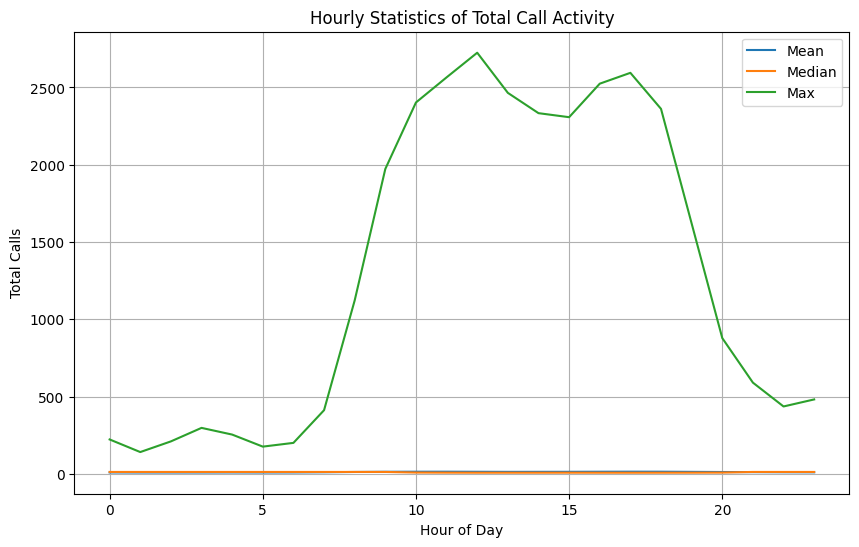

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(call_stats_by_hour.index, call_stats_by_hour["mean"], label="Mean")
plt.plot(call_stats_by_hour.index, call_stats_by_hour["median"], label="Median")
plt.plot(call_stats_by_hour.index, call_stats_by_hour["max"], label="Max")

plt.xlabel("Hour of Day")
plt.ylabel("Total Calls")
plt.title("Hourly Statistics of Total Call Activity")
plt.legend()
plt.grid(True)
plt.show()


Daytime vs Nighttime Activity

In [62]:

# Daytime vs Nighttime TOTAL Activity (Calls + SMS + Internet)


# Define total activity per record

combined_df["total_activity"] = (
    combined_df["total_calls"] +
    combined_df["total_sms"] +
    combined_df["total_internet"]
)

# Daytime: 6am–8pm

day_activity = combined_df.loc[
    (combined_df["hour"] >= 6) & (combined_df["hour"] < 20),
    "total_activity"
].sum()

# Nighttime: 8pm–6am

night_activity = combined_df.loc[
    (combined_df["hour"] < 6) | (combined_df["hour"] >= 20),
    "total_activity"
].sum()

total_activity = day_activity + night_activity

# Output as clean percentage table

pd.DataFrame(
    {
        "Total Activity": [day_activity, night_activity],
        "Percentage (%)": [
            day_activity / total_activity * 100,
            night_activity / total_activity * 100
        ]
    },
    index=["Daytime (6am–8pm)", "Nighttime (8pm–6am)"]
).round(2)


,Total Activity,Percentage (%)
Daytime (6am–8pm),6.310280e+08,73.55
Nighttime (8pm–6am),2.269183e+08,26.45


Domestic vs International Call Timing

In [ ]:

# Compare hourly call patterns for domestic vs international


# Filter data

domestic_calls = combined_df[combined_df["countrycode"] == 39]
international_calls = combined_df[combined_df["countrycode"] != 39]

# Compute hourly mean total calls

domestic_hourly = domestic_calls.groupby("hour")["total_calls"].mean()
international_hourly = international_calls.groupby("hour")["total_calls"].mean()

# Combine into a single comparison table

hourly_comparison = pd.DataFrame({
    "Domestic Calls (Mean)": domestic_hourly,
    "International Calls (Mean)": international_hourly
})

hourly_comparison



,Domestic Calls (Mean),International Calls (Mean)
hour,,
0,4.669291,11.680457
1,3.253977,12.168112
2,3.871361,12.339537
3,4.357624,12.437824
4,4.310516,12.529238
5,3.076117,12.236029
6,3.917451,11.684576
7,14.715206,11.002251
8,40.760643,10.410773


Visualisation of Domestic vs International Call Timing

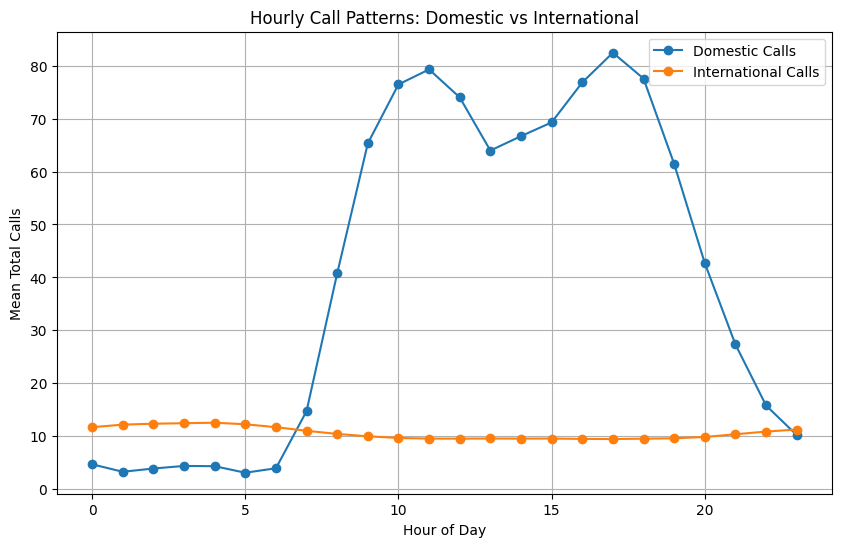

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(hourly_comparison.index,
        hourly_comparison["Domestic Calls (Mean)"],
        label="Domestic Calls",
        marker="o")

plt.plot(hourly_comparison.index,
        hourly_comparison["International Calls (Mean)"],
        label="International Calls",
        marker="o")

plt.xlabel("Hour of Day")
plt.ylabel("Mean Total Calls")
plt.title("Hourly Call Patterns: Domestic vs International")
plt.legend()
plt.grid(True)
plt.show()


NumPy Comparison: Calls (Domestic vs International)

In [ ]:
import numpy as np

# Ensure domestic and international subsets exist

domestic_df = combined_df[combined_df["countrycode"] == 39]
international_df = combined_df[combined_df["countrycode"] != 39]

dom_calls = np.sum(domestic_df["total_calls"].values)
intl_calls = np.sum(international_df["total_calls"].values)
total_calls = dom_calls + intl_calls

pd.DataFrame({
    "Total": [dom_calls, intl_calls],
    "Percentage (%)": [
        dom_calls / total_calls * 100,
        intl_calls / total_calls * 100
    ]
}, index=["Domestic Calls", "International Calls"]).round(2)


,Total,Percentage (%)
Domestic Calls,29174229.90,33.11
International Calls,58949841.43,66.89


Visualization of the Comparison Domestic vs International (Calls)

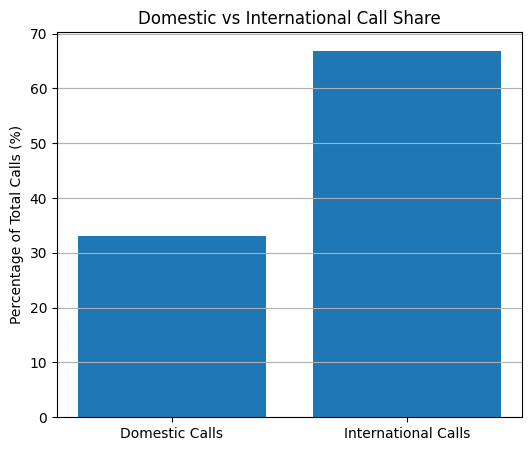

In [49]:

labels = ["Domestic Calls", "International Calls"]
percentages = [
    dom_calls / total_calls * 100,
    intl_calls / total_calls * 100
]

plt.figure(figsize=(6, 5))
plt.bar(labels, percentages)

plt.ylabel("Percentage of Total Calls (%)")
plt.title("Domestic vs International Call Share")
plt.grid(axis="y")
plt.show()


NumPy Comparison: SMS

In [50]:

# NumPy Comparison: SMS Percentages


dom_sms = np.sum(domestic_df["total_sms"].values)
intl_sms = np.sum(international_df["total_sms"].values)
total_sms = dom_sms + intl_sms

pd.DataFrame({
    "Percentage (%)": [
        dom_sms / total_sms * 100,
        intl_sms / total_sms * 100
    ]
}, index=["Domestic SMS", "International SMS"]).round(2)


,Percentage (%)
Domestic SMS,24.98
International SMS,75.02


Visualization Comparison Domestic vs International (SMS)

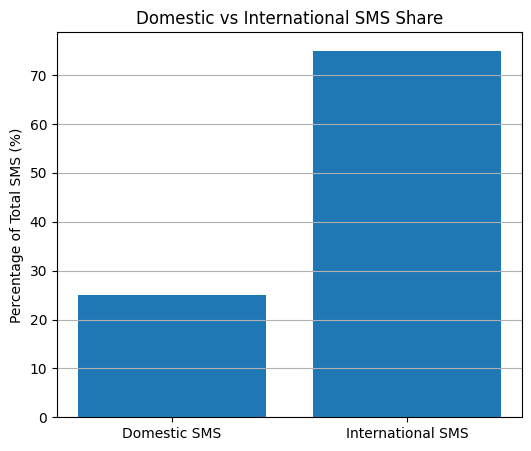

In [51]:

labels = ["Domestic SMS", "International SMS"]
percentages = [
    dom_sms / total_sms * 100,
    intl_sms / total_sms * 100
]

plt.figure(figsize=(6, 5))
plt.bar(labels, percentages)

plt.ylabel("Percentage of Total SMS (%)")
plt.title("Domestic vs International SMS Share")
plt.grid(axis="y")
plt.show()


Incoming vs Outgoing International Calls

In [52]:

# Incoming vs Outgoing International Calls


incoming = np.sum(international_df["callin"].values)
outgoing = np.sum(international_df["callout"].values)

pd.DataFrame({
    "Total": [incoming, outgoing, incoming / outgoing]
}, index=[
    "Incoming International Calls",
    "Outgoing International Calls",
    "Incoming / Outgoing Ratio"
]).round(4)


,Total
Incoming International Calls,3.691180e+07
Outgoing International Calls,2.203804e+07
Incoming / Outgoing Ratio,1.674900e+00


Visualization Incoming vs Outgoing (Calls)

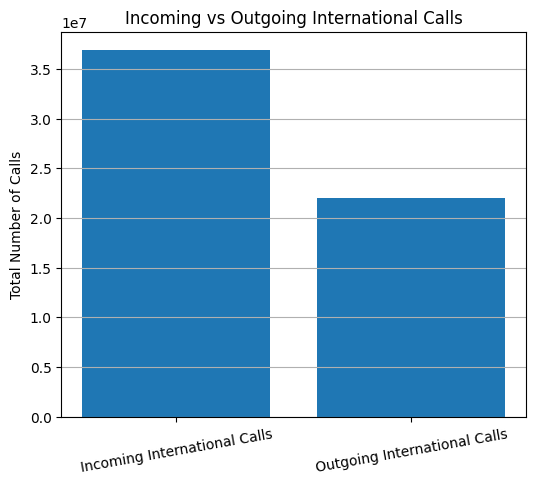

In [53]:

labels = ["Incoming International Calls", "Outgoing International Calls"]
values = [incoming, outgoing]

plt.figure(figsize=(6, 5))
plt.bar(labels, values)

plt.ylabel("Total Number of Calls")
plt.title("Incoming vs Outgoing International Calls")
plt.xticks(rotation=10)
plt.grid(axis="y")
plt.show()


Correlation: SMS vs Calls (Grid Level)

In [54]:

# Correlation: SMS vs Calls (Grid Level)


grid_sms = combined_df.groupby("CellID")["total_sms"].sum().values
grid_calls = combined_df.groupby("CellID")["total_calls"].sum().values

pd.DataFrame(
    {"Pearson Correlation": [np.corrcoef(grid_sms, grid_calls)[0, 1]]},
    index=["SMS vs Calls"]
).round(4)


,Pearson Correlation
SMS vs Calls,0.9862


Use NumPy for Statistical Comparisons


Domestic Calls Statistics:
  Mean:   40.5200
  Std:    93.2892
  Median: 10.9838

International Calls Statistics:
  Mean:   10.0872
  Std:    3.8051
  Median: 13.4253

Mean Difference: 30.4329
Domestic calls are higher on average


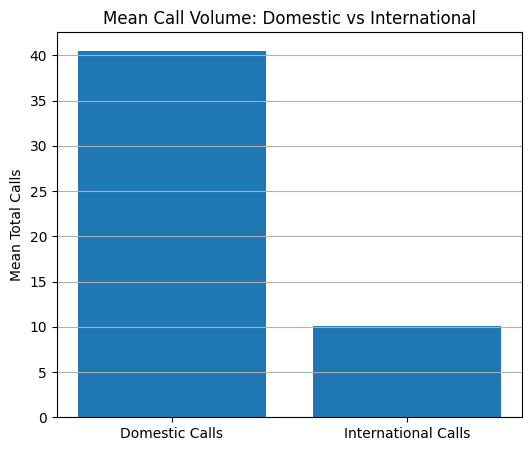

In [55]:

# Separate domestic (Italy = 39) and international data

domestic_df = combined_df[combined_df["countrycode"] == 39]
international_df = combined_df[combined_df["countrycode"] != 39]

# Extract as numpy arrays

domestic_calls = domestic_df["total_calls"].values
international_calls = international_df["total_calls"].values

# Compute statistics using NumPy

print("\nDomestic Calls Statistics:")
print(f"  Mean:   {np.mean(domestic_calls):.4f}")
print(f"  Std:    {np.std(domestic_calls):.4f}")
print(f"  Median: {np.median(domestic_calls):.4f}")

print("\nInternational Calls Statistics:")
print(f"  Mean:   {np.mean(international_calls):.4f}")
print(f"  Std:    {np.std(international_calls):.4f}")
print(f"  Median: {np.median(international_calls):.4f}")

# Comparison

mean_difference = np.mean(domestic_calls) - np.mean(international_calls)
print(f"\nMean Difference: {mean_difference:.4f}")
print(f"Domestic calls are {'higher' if mean_difference > 0 else 'lower'} on average")


# Visualization


labels = ["Domestic Calls", "International Calls"]
means = [np.mean(domestic_calls), np.mean(international_calls)]

plt.figure(figsize=(6, 5))
plt.bar(labels, means)
plt.ylabel("Mean Total Calls")
plt.title("Mean Call Volume: Domestic vs International")
plt.grid(axis="y")
plt.show()


- Percentage of International vs Domestic CALLS


Domestic Calls (Italy):    33.11%
International Calls:       66.89%

Total Calls Analyzed:      88,124,071
  - Domestic:              29,174,230
  - International:         58,949,841


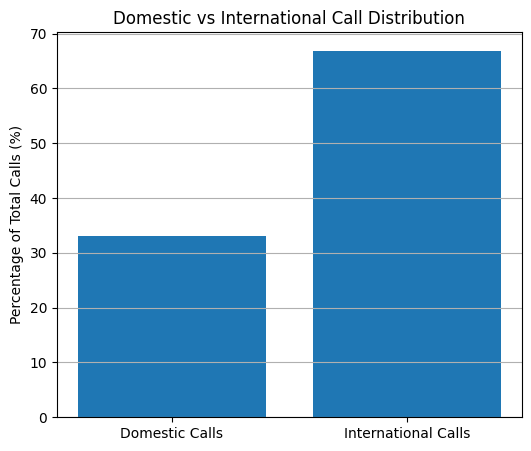

In [56]:

# Calculate total calls using NumPy

domestic_total = np.sum(domestic_df["total_calls"].values)
international_total = np.sum(international_df["total_calls"].values)
grand_total = domestic_total + international_total

# Calculate percentages using NumPy

domestic_pct = (domestic_total / grand_total) * 100
international_pct = (international_total / grand_total) * 100

# Print results

print(f"\nDomestic Calls (Italy):    {domestic_pct:.2f}%")
print(f"International Calls:       {international_pct:.2f}%")
print(f"\nTotal Calls Analyzed:      {grand_total:,.0f}")
print(f"  - Domestic:              {domestic_total:,.0f}")
print(f"  - International:         {international_total:,.0f}")


# Visualization

labels = ["Domestic Calls", "International Calls"]
percentages = [domestic_pct, international_pct]

plt.figure(figsize=(6, 5))
plt.bar(labels, percentages)

plt.ylabel("Percentage of Total Calls (%)")
plt.title("Domestic vs International Call Distribution")
plt.grid(axis="y")
plt.show()


- Percentage of International vs Domestic SMS


Domestic SMS (Italy):      24.98%
International SMS:         75.02%

Total SMS Analyzed:        100,447,578
  - Domestic:              25,092,956
  - International:         75,354,623


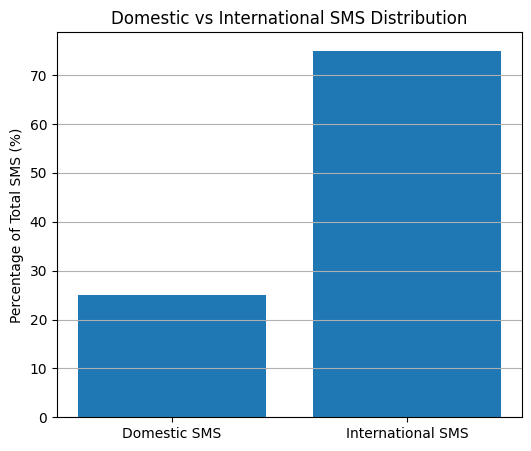

In [57]:


# Calculate total SMS using NumPy

domestic_sms_total = np.sum(domestic_df["total_sms"].values)
international_sms_total = np.sum(international_df["total_sms"].values)
grand_sms_total = domestic_sms_total + international_sms_total

# Calculate percentages using NumPy

domestic_sms_pct = (domestic_sms_total / grand_sms_total) * 100
international_sms_pct = (international_sms_total / grand_sms_total) * 100

# Print results

print(f"\nDomestic SMS (Italy):      {domestic_sms_pct:.2f}%")
print(f"International SMS:         {international_sms_pct:.2f}%")
print(f"\nTotal SMS Analyzed:        {grand_sms_total:,.0f}")
print(f"  - Domestic:              {domestic_sms_total:,.0f}")
print(f"  - International:         {international_sms_total:,.0f}")



# Visualization

labels = ["Domestic SMS", "International SMS"]
percentages = [domestic_sms_pct, international_sms_pct]

plt.figure(figsize=(6, 5))
plt.bar(labels, percentages)

plt.ylabel("Percentage of Total SMS (%)")
plt.title("Domestic vs International SMS Distribution")
plt.grid(axis="y")
plt.show()


- International Calls - Incoming vs Outgoing Ratio


Total Incoming International Calls:  36,911,800.81
Total Outgoing International Calls:  22,038,040.62

Ratio (Incoming/Outgoing):           1.6749

Interpretation: More incoming international calls
→ 1.67x more incoming than outgoing
→ Suggests Italy receives more international calls (tourism/business)


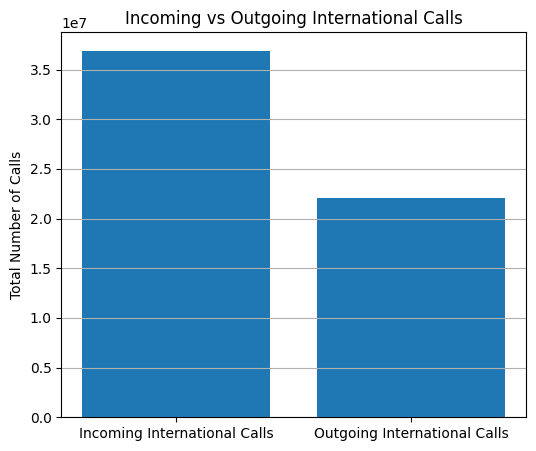

In [59]:


# Extract incoming and outgoing international calls as NumPy arrays

intl_incoming = international_df["callin"].values
intl_outgoing = international_df["callout"].values

# Calculate totals

total_incoming = np.sum(intl_incoming)
total_outgoing = np.sum(intl_outgoing)

# Calculate ratio

incoming_outgoing_ratio = total_incoming / total_outgoing

# Print results

print(f"\nTotal Incoming International Calls:  {total_incoming:,.2f}")
print(f"Total Outgoing International Calls:  {total_outgoing:,.2f}")
print(f"\nRatio (Incoming/Outgoing):           {incoming_outgoing_ratio:.4f}")

if incoming_outgoing_ratio > 1:
    print(f"\nInterpretation: More incoming international calls")
    print(f"→ {incoming_outgoing_ratio:.2f}x more incoming than outgoing")
    print(f"→ Suggests Italy receives more international calls (tourism/business)")
else:
    print(f"\nInterpretation: More outgoing international calls")
    print(f"→ {1/incoming_outgoing_ratio:.2f}x more outgoing than incoming")
    print(f"→ Suggests Italians make more calls abroad")


# Visualization


labels = ["Incoming International Calls", "Outgoing International Calls"]
values = [total_incoming, total_outgoing]

plt.figure(figsize=(6, 5))
plt.bar(labels, values)

plt.ylabel("Total Number of Calls")
plt.title("Incoming vs Outgoing International Calls")
plt.grid(axis="y")
plt.show()


- Correlation Between SMS and Call Volume at Grid Level








Number of Grid Cells Analyzed: 10000

SMS Volume Statistics:
  Mean:     10,044.76
  Std:      7,183.73
  Min:      1,044.88
  Max:      103,730.25

Call Volume Statistics:
  Mean:     8,812.41
  Std:      6,311.50
  Min:      1,362.96
  Max:      92,429.74

Interpretation:
  Strength: Strong positive correlation
  Meaning:  Grid cells with high SMS activity strongly tend to have high call activity

Covariance: 44,720,522.42


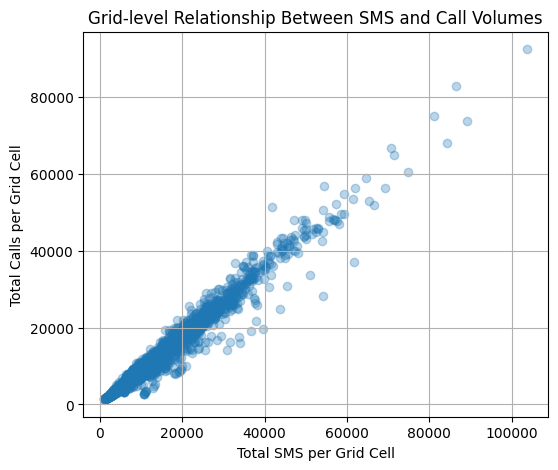

In [60]:

# Aggregate by grid (CellID) and convert to NumPy arrays


grid_sms = combined_df.groupby("CellID")["total_sms"].sum().values
grid_calls = combined_df.groupby("CellID")["total_calls"].sum().values

# Correlation using NumPy


correlation_matrix = np.corrcoef(grid_sms, grid_calls)
sms_call_correlation = correlation_matrix[0, 1]


# Descriptive statistics


print(f"\nNumber of Grid Cells Analyzed: {len(grid_sms)}")

print(f"\nSMS Volume Statistics:")
print(f"  Mean:     {np.mean(grid_sms):,.2f}")
print(f"  Std:      {np.std(grid_sms):,.2f}")
print(f"  Min:      {np.min(grid_sms):,.2f}")
print(f"  Max:      {np.max(grid_sms):,.2f}")

print(f"\nCall Volume Statistics:")
print(f"  Mean:     {np.mean(grid_calls):,.2f}")
print(f"  Std:      {np.std(grid_calls):,.2f}")
print(f"  Min:      {np.min(grid_calls):,.2f}")
print(f"  Max:      {np.max(grid_calls):,.2f}")


# Interpretation


if sms_call_correlation > 0.7:
    strength = "Strong positive"
    interpretation = "Grid cells with high SMS activity strongly tend to have high call activity"
elif sms_call_correlation > 0.4:
    strength = "Moderate positive"
    interpretation = "Grid cells with high SMS activity moderately tend to have high call activity"
elif sms_call_correlation > 0:
    strength = "Weak positive"
    interpretation = "Grid cells with high SMS activity slightly tend to have high call activity"
else:
    strength = "Negative or none"
    interpretation = "No clear positive relationship between SMS and call volumes"

print(f"\nInterpretation:")
print(f"  Strength: {strength} correlation")
print(f"  Meaning:  {interpretation}")


# Additional NumPy analysis


covariance = np.cov(grid_sms, grid_calls)[0, 1]
print(f"\nCovariance: {covariance:,.2f}")


# Visualization: Grid-level relationship

plt.figure(figsize=(6, 5))
plt.scatter(grid_sms, grid_calls, alpha=0.3)
plt.xlabel("Total SMS per Grid Cell")
plt.ylabel("Total Calls per Grid Cell")
plt.title("Grid-level Relationship Between SMS and Call Volumes")
plt.grid(True)
plt.show()
